In [5]:
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


# Manipulacion y representación de señales en Python

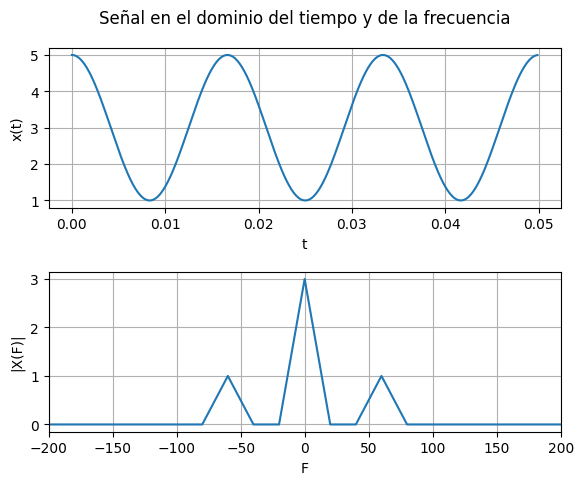

In [63]:
FS: int = 8000
t = np.arange(0, 0.05, 1/FS )
x = 3 + 2*np.cos(120*np.pi*t)

X = abs(np.fft.fftshift(np.fft.fft(x)))/len(x)
F = ((np.arange(0, len(x)))/len(x)-0.5)*FS

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t, x)
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-200,200])
ax2.grid()

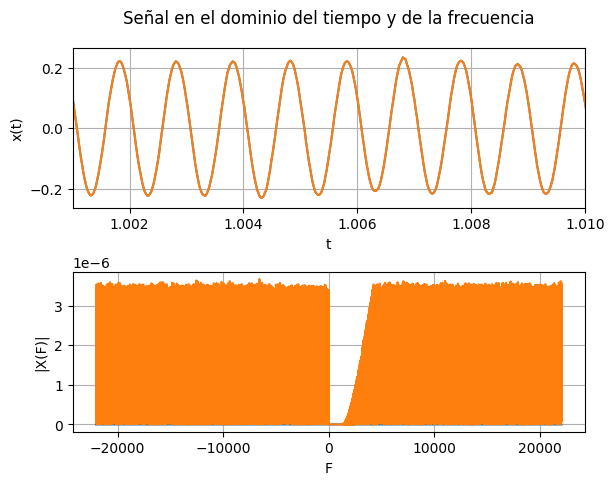

In [72]:
import sounddevice as sd

fs = 44100  # Sample rate
seconds = 3  # Duration of recording

recording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
sd.wait()  # Wait until recording is finished


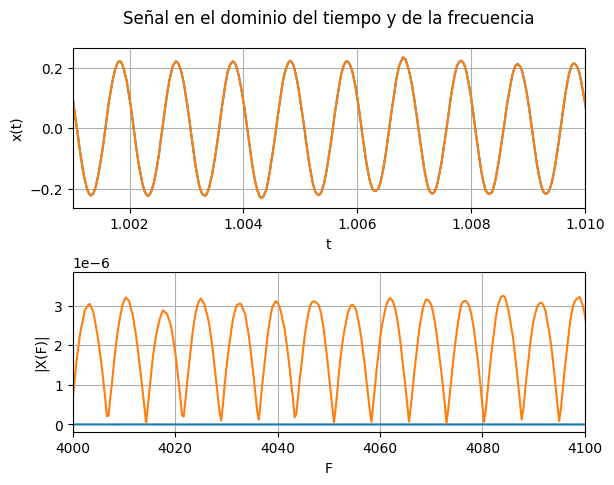

In [74]:
t = np.arange(0, seconds, 1 / fs)


X = np.fft.fftshift(np.abs(np.fft.fft(recording))) / len(recording)
F = ((np.arange(0, len(recording))) / len(recording) - 0.5) * fs

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t, recording)
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax1.set_xlim([1.001, 1.01])
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([4000,4100])
ax2.grid()

In [76]:
sd.playrec(recording, fs, 1)
sd.wait()

In [18]:
inverted = - recording
sd.playrec(inverted, fs, 2)
sd.wait()

In [75]:
saturated = 100 * recording
sd.playrec(saturated, fs, 2)
sd.wait()

# Conversion D/A: Reconstruccion de señales a partir de sus muestras

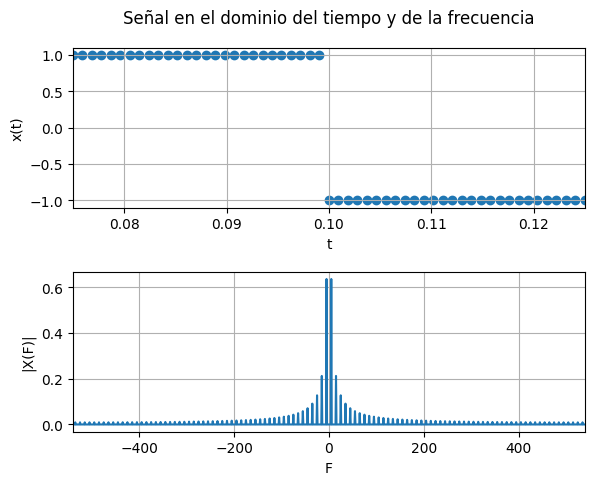

In [85]:
from scipy import signal


FS = 1080
t = np.arange(0, 1, 1 / FS)
F = 60

x = signal.square(2 * np.pi * 5 * t)

X = abs(np.fft.fftshift(np.fft.fft(x))) / len(x)
F = ((np.arange(0, len(x))) / len(x) - 0.5) * FS

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.scatter(t, x)
ax1.set_xlim([0.075, 0.125])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-FS/2, FS/2])
ax2.grid()

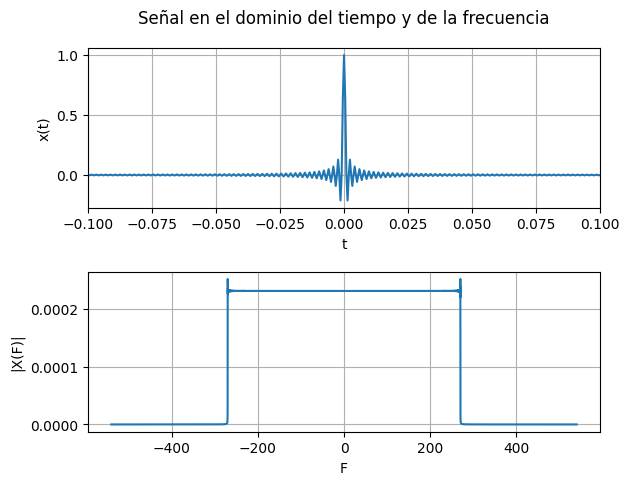

In [92]:
t_gen = np.arange(-2, 2, 1 / (2*FS))

generator_signal = np.sin(FS * t_gen * np.pi) / (FS * t_gen * np.pi)

X = abs(np.fft.fftshift(np.fft.fft(generator_signal))) / len(generator_signal)
F = ((np.arange(0, len(generator_signal))) / len(generator_signal) - 0.5) * FS

fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
fig.suptitle("Señal en el dominio del tiempo y de la frecuencia")
ax1.plot(t_gen, generator_signal)
ax1.set_xlim([-0.1, 0.1])
ax1.set_ylabel("x(t)")
ax1.set_xlabel("t")
ax1.grid()
ax2.plot(F, X)
ax2.set_ylabel("|X(F)|")
ax2.set_xlabel("F")
ax2.set_xlim([-1.1* FS / 2, 1.1 * FS / 2])
ax2.grid()

C:\Users\Andres\AppData\Local\Temp\ipykernel_4232\2738628578.py:6: RuntimeWarning: invalid value encountered in scalar divide
  sum += _x * np.sin(FS * (_t - index / FS)* np.pi) / (FS *(_t - index / FS) * np.pi)


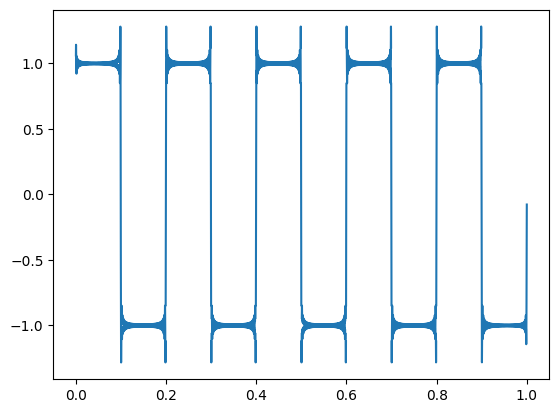

In [94]:
x_reconstructed = []
t_rec = np.arange(0, 1, 1 / (10*FS))
for _t in t_rec:
    sum = 0
    for index, _x in enumerate(x):
        sum += _x * np.sin(FS * (_t - index / FS)* np.pi) / (FS *(_t - index / FS) * np.pi)
    x_reconstructed.append(sum)
plt.plot(t_rec, x_reconstructed)

# Procesamiento de pantalla verde